In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
import pandas as pd

def DF_tmp_data(file_name):
    
    with open(file_name, 'rb') as f:
        mpduPackets = f.read().split(b'\x1A\xCF\xFC\x1D')[1:]

    headers = [[], [], []]
    for k, packet in enumerate(mpduPackets):
        # classify the packets by the VCDU header
        if packet[:2] == b'\x55\x40':
            headers[0].append('IM')
            headers[2].append(packet[5:])
        elif packet[:2] == b'\x40\x3F':
            headers[0].append('HK')
            headers[2].append(packet[5:])
        else:
            continue
        
        headers[1].append(int.from_bytes(packet[2:5], 'big'))
        
    headerDF = pd.DataFrame({
        'VCDU': headers[0],
        'PSC': pd.Series(headers[1], dtype=int),
        'data': pd.Series(headers[2], dtype='object')  # Preserve binary data    
    })
    
    return headerDF

    
filename = './raw_data/opt_frame_0005_F20250109155612.bin'
DF_tmp_data(filename)
DF = DF_tmp_data(filename)
#print(DF['VCDU'])
#print(DF.iloc[:,0])
IM = DF[DF['VCDU']=='IM']
DATA = IM['data'] #data
# print(DATA)
data = bytes()
for i in range(len(IM)):
    data += DATA[i]
data_rs = data.rstrip(b'\0')
#print(len(data1))
data_array = np.frombuffer(data_rs,dtype=np.uint16)  #create a numpy array from object(such as bytes or bytearrays)   
#print(type(data_array)) 
image_data = data_array.reshape(3003,3008)
#print(image_data.shape)

#write a text file
a = ['1\n','2\n','3\n']
f = open('/home/william/VERTECS/code/python_program/python_program/image_check/test.txt','w')
f.writelines(a)  #write line by line
f.close()

#read the text
ff = open('/home/william/VERTECS/code/python_program/python_program/image_check/test.txt','r')
information = ff.readlines()
header = []
for info in information:
    header.append(info.strip())  #delete the '\n' after element in a

#write image data and header information in fits file
hdu = fits.PrimaryHDU(image_data)  #fits.PrimaryHDU(data)
hdu.header['header1'] = header[0]
hdu.header['header2'] = header[1]
hdu.header['header3'] = header[2]

file_name = input("input file name or enter empty to exit:\n")
#add the header information

#if filename isn't a empty string
if file_name != "":
    hdu.writeto(f'/home/william/VERTECS/code/python_program/data_check/{file_name}_test.fits',overwrite=True)
    #plt.savefig(f'/home/william/VERTECS/code/python_program/data_check/{file_name}.png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.io import fits

In [ ]:
#read the optical file
#files = glob.glob('C:/Users/stc/Desktop/VERTECS/code/python_program/python_program/image_check/optical/*.bin')
files = glob.glob('./optical/*.bin')
# print(files)

#.sort: sequencing ; key:sequencing condition ; 
files.sort(key=lambda x:int(x.split('/')[-1].split('_')[2].split('_')[0]))
#print(files[0].split('/')[-1].split('_')[2])


#files[-1]: read the last element
file = files[0]
print(file)

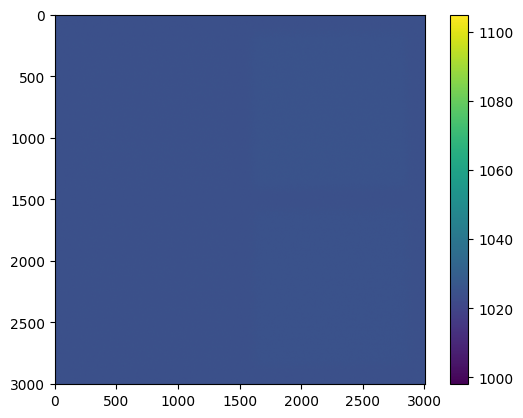

In [9]:
#read the data from file
data = np.fromfile(file,dtype=np.uint16)
#reshape the data
image_array = data.reshape(3003,3008)
#plt.ion() #interactive mode
plt.imshow(image_array,)
plt.colorbar()
#plt.show()
# input()
#header_list = []
#header = input('input the header information:\n')
#header_list.append(header)

#write a text file
a = ['1\n','2\n','3\n']
f = open('/home/william/VERTECS/code/python_program/python_program/image_check/test.txt','w')
f.writelines(a)  #write line by line
f.close()

#read the text
ff = open('/home/william/VERTECS/code/python_program/python_program/image_check/test.txt','r')
information = ff.readlines()
header = []
for info in information:
    header.append(info.strip())  #delete the '\n' after element in a

#write image data and header information in fits file
hdu = fits.PrimaryHDU(image_array)  #fits.PrimaryHDU(data)
hdu.header['header1'] = header[0]
hdu.header['header2'] = header[1]
hdu.header['header3'] = header[2]

file_name = input("input file name or enter empty to exit:\n")
#add the header information

#if filename isn't a empty string
if file_name != "":
    hdu.writeto(f'/home/william/VERTECS/code/python_program/data_check/{file_name}_ah2.fits',overwrite=True)
    #plt.savefig(f'/home/william/VERTECS/code/python_program/data_check/{file_name}.png')
